SILICON SLAB WAVEGUIDE COMPREHENSIVE ANALYSIS


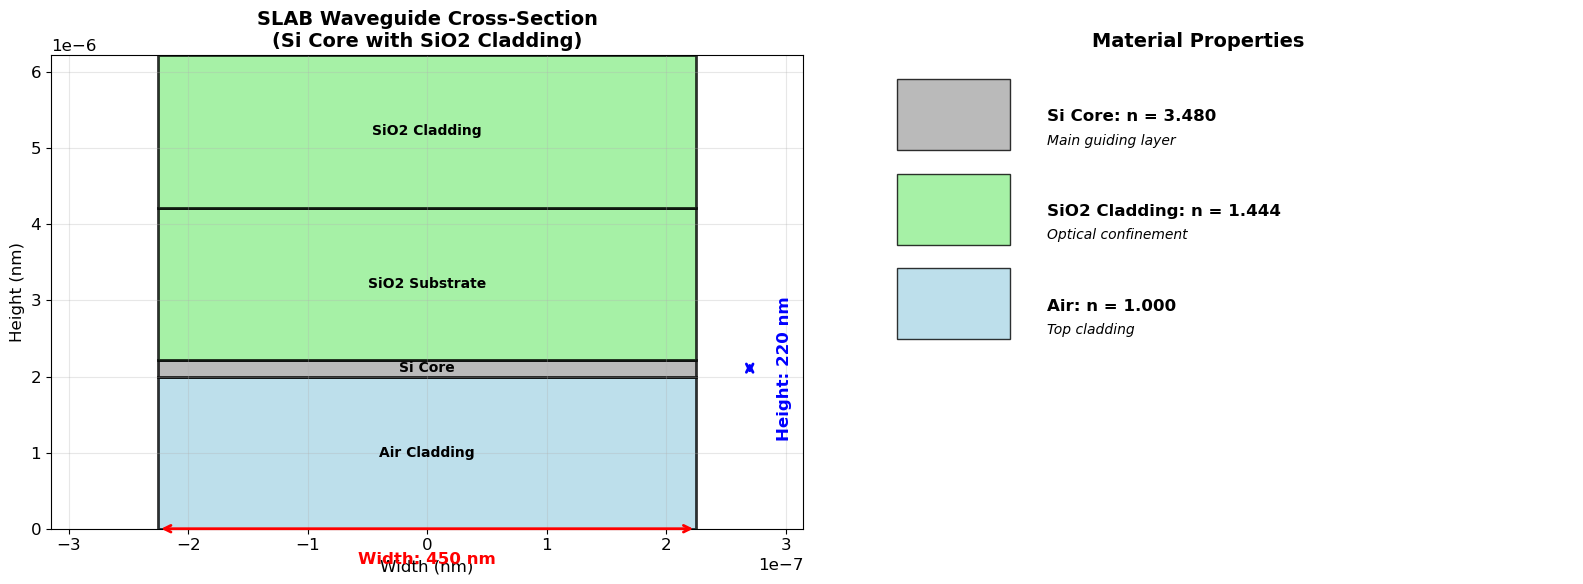

🔬 Analyzing wavelength dependence (1450-1550nm)...
✅ Wavelength analysis completed
📏 Analyzing width dependence...
✅ Width dependence analysis completed
📐 Analyzing height dependence...
✅ Height dependence analysis completed
📊 Plotting wavelength analysis...


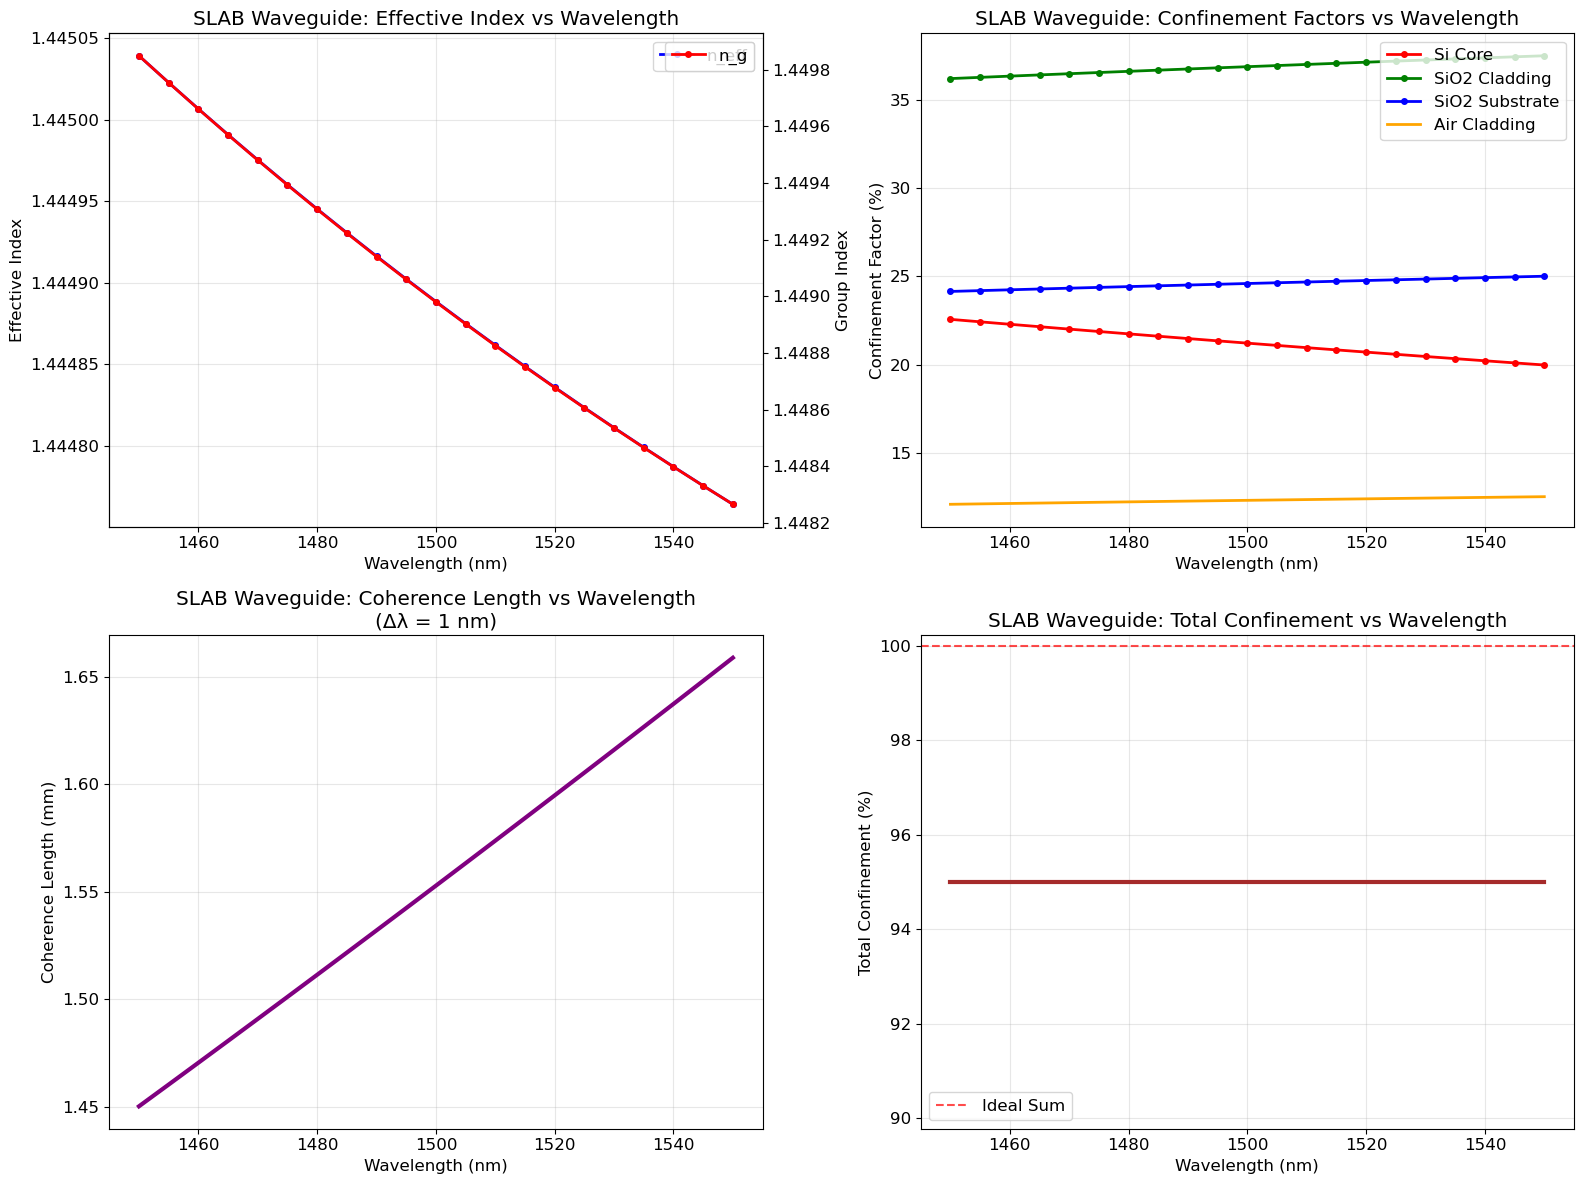

✅ Wavelength analysis plots saved
⚡ Plotting electric field profiles...


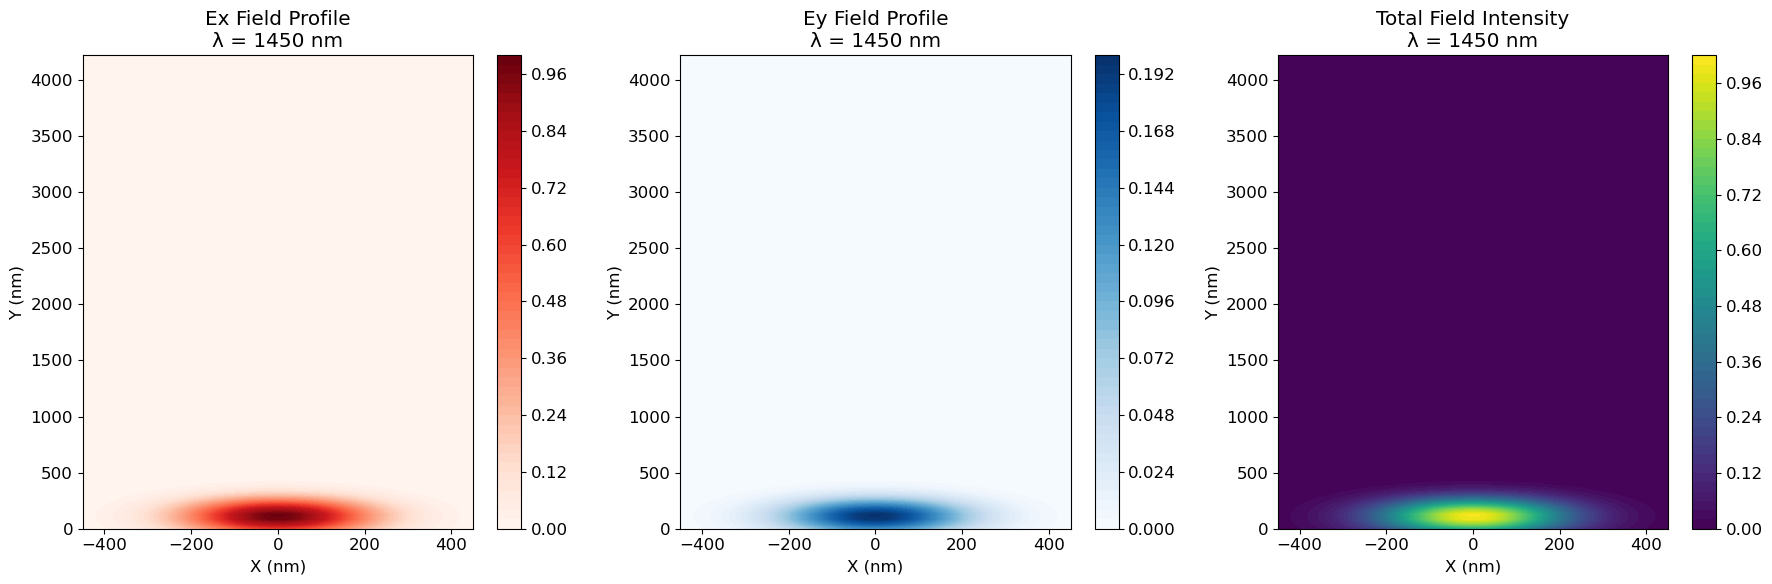

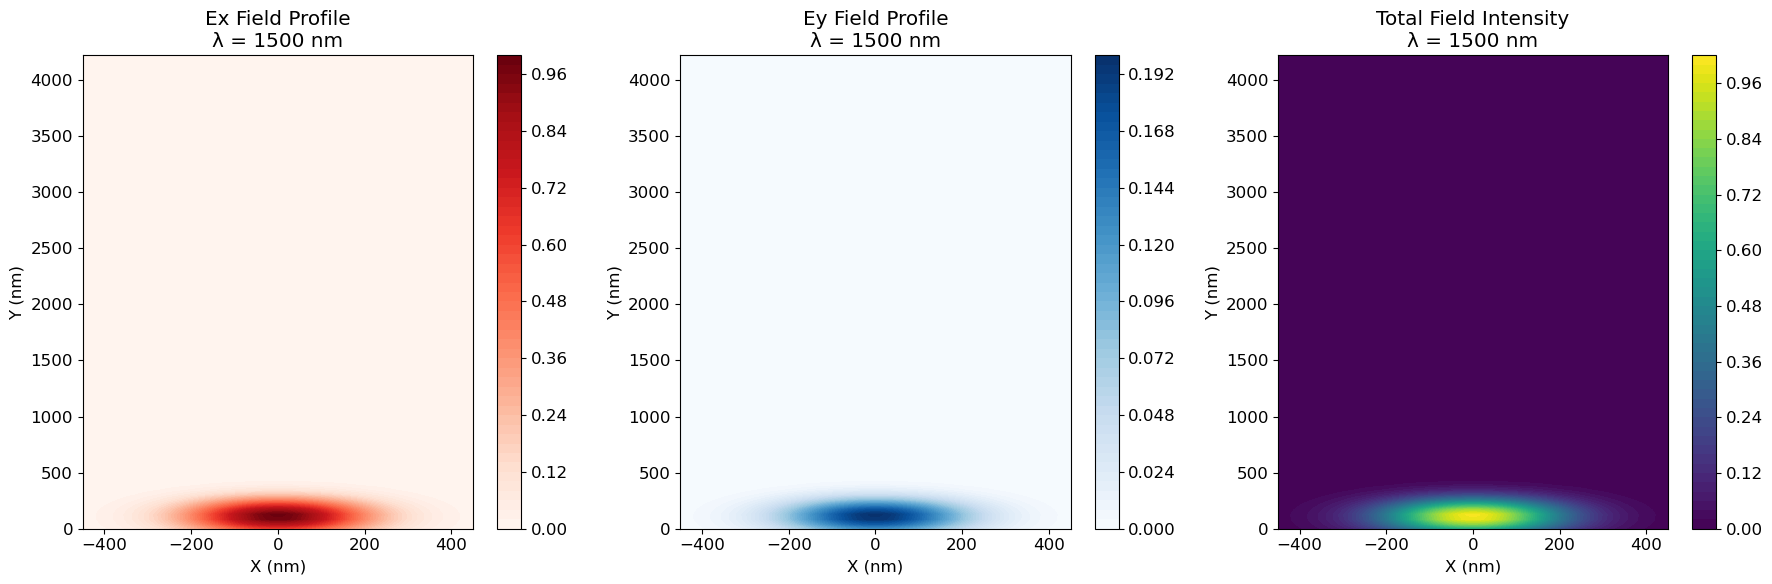

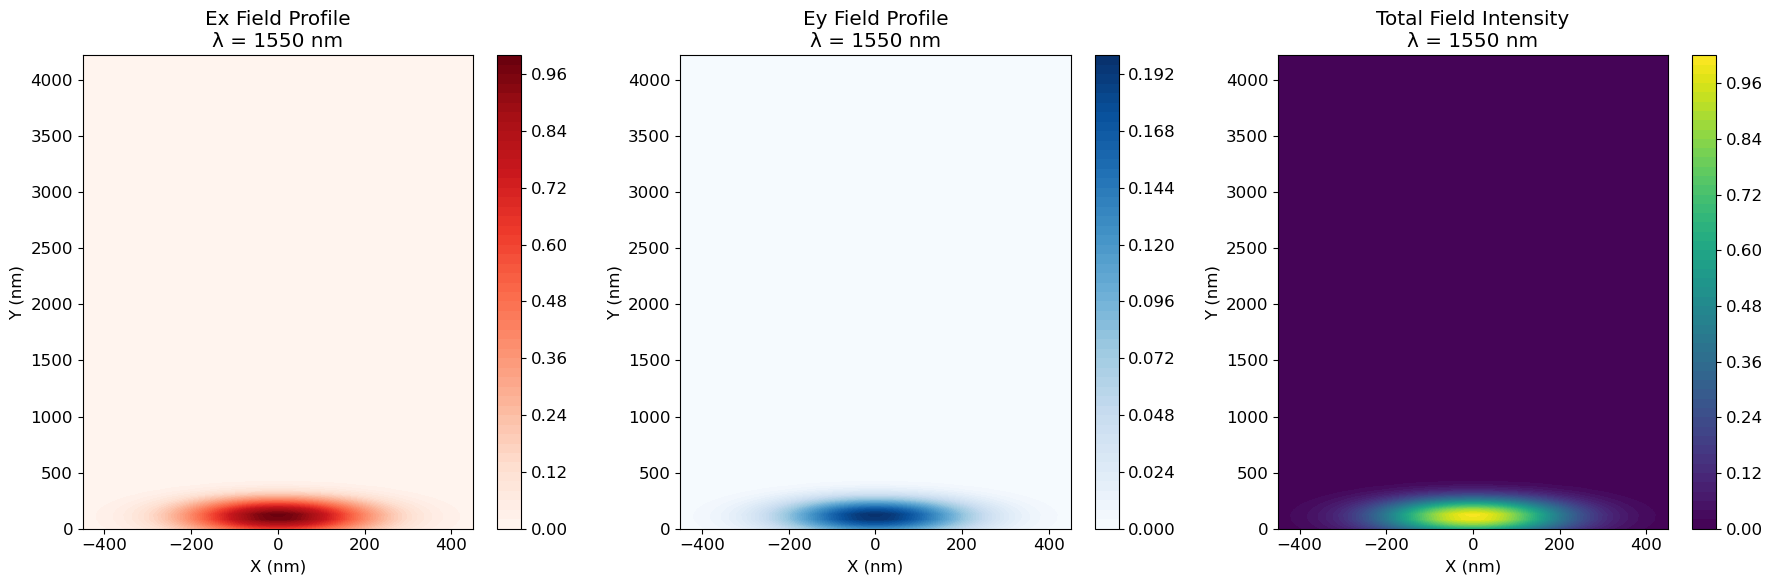

✅ Electric field profiles plotted
📈 Plotting width dependence...


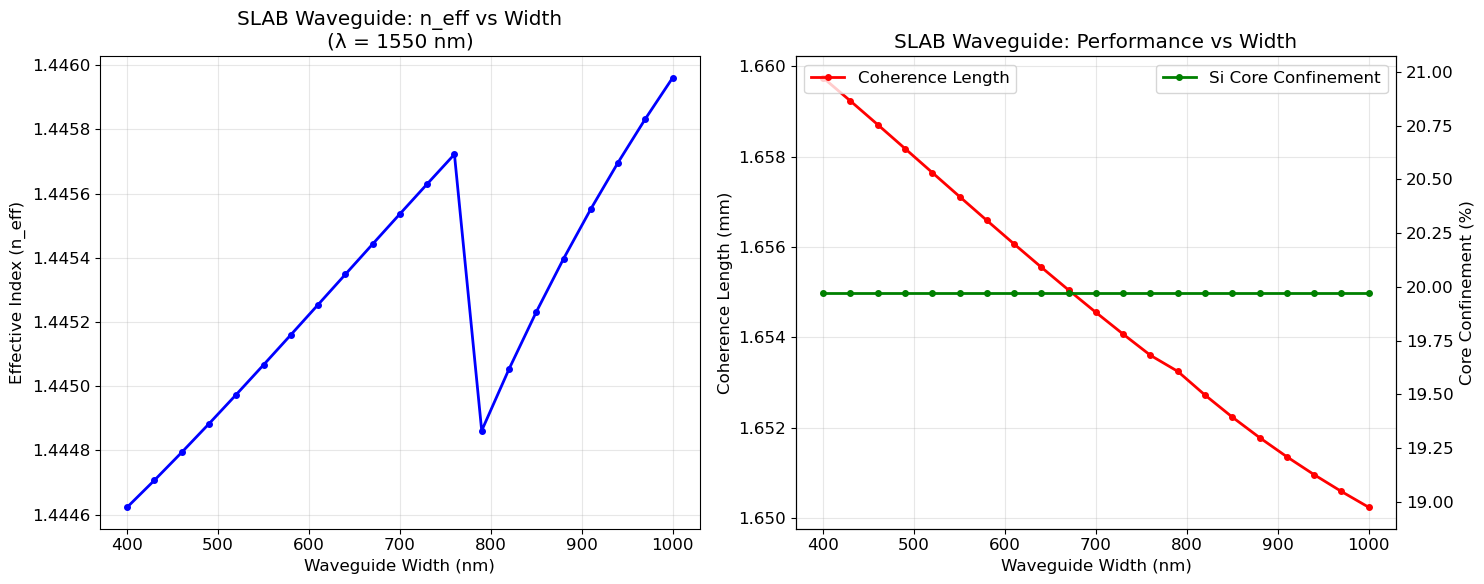

✅ Width dependence plots saved
📊 Plotting height dependence...


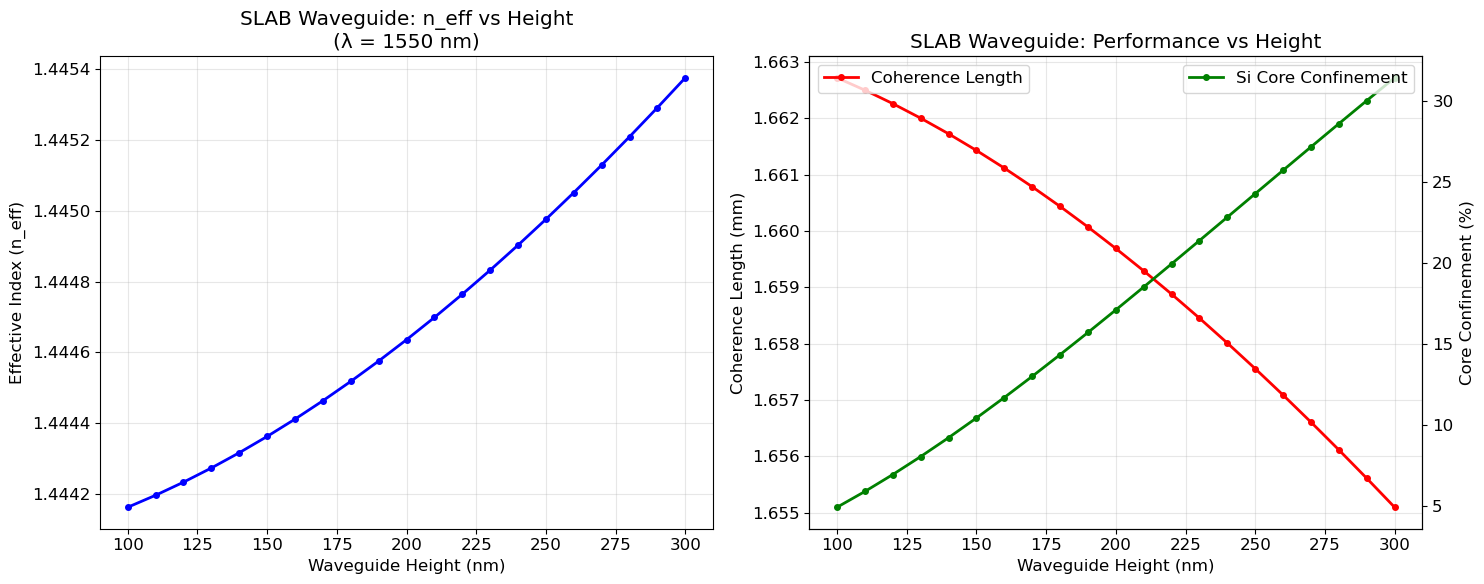

✅ Height dependence plots saved
🎯 Plotting SLAB waveguide applications...


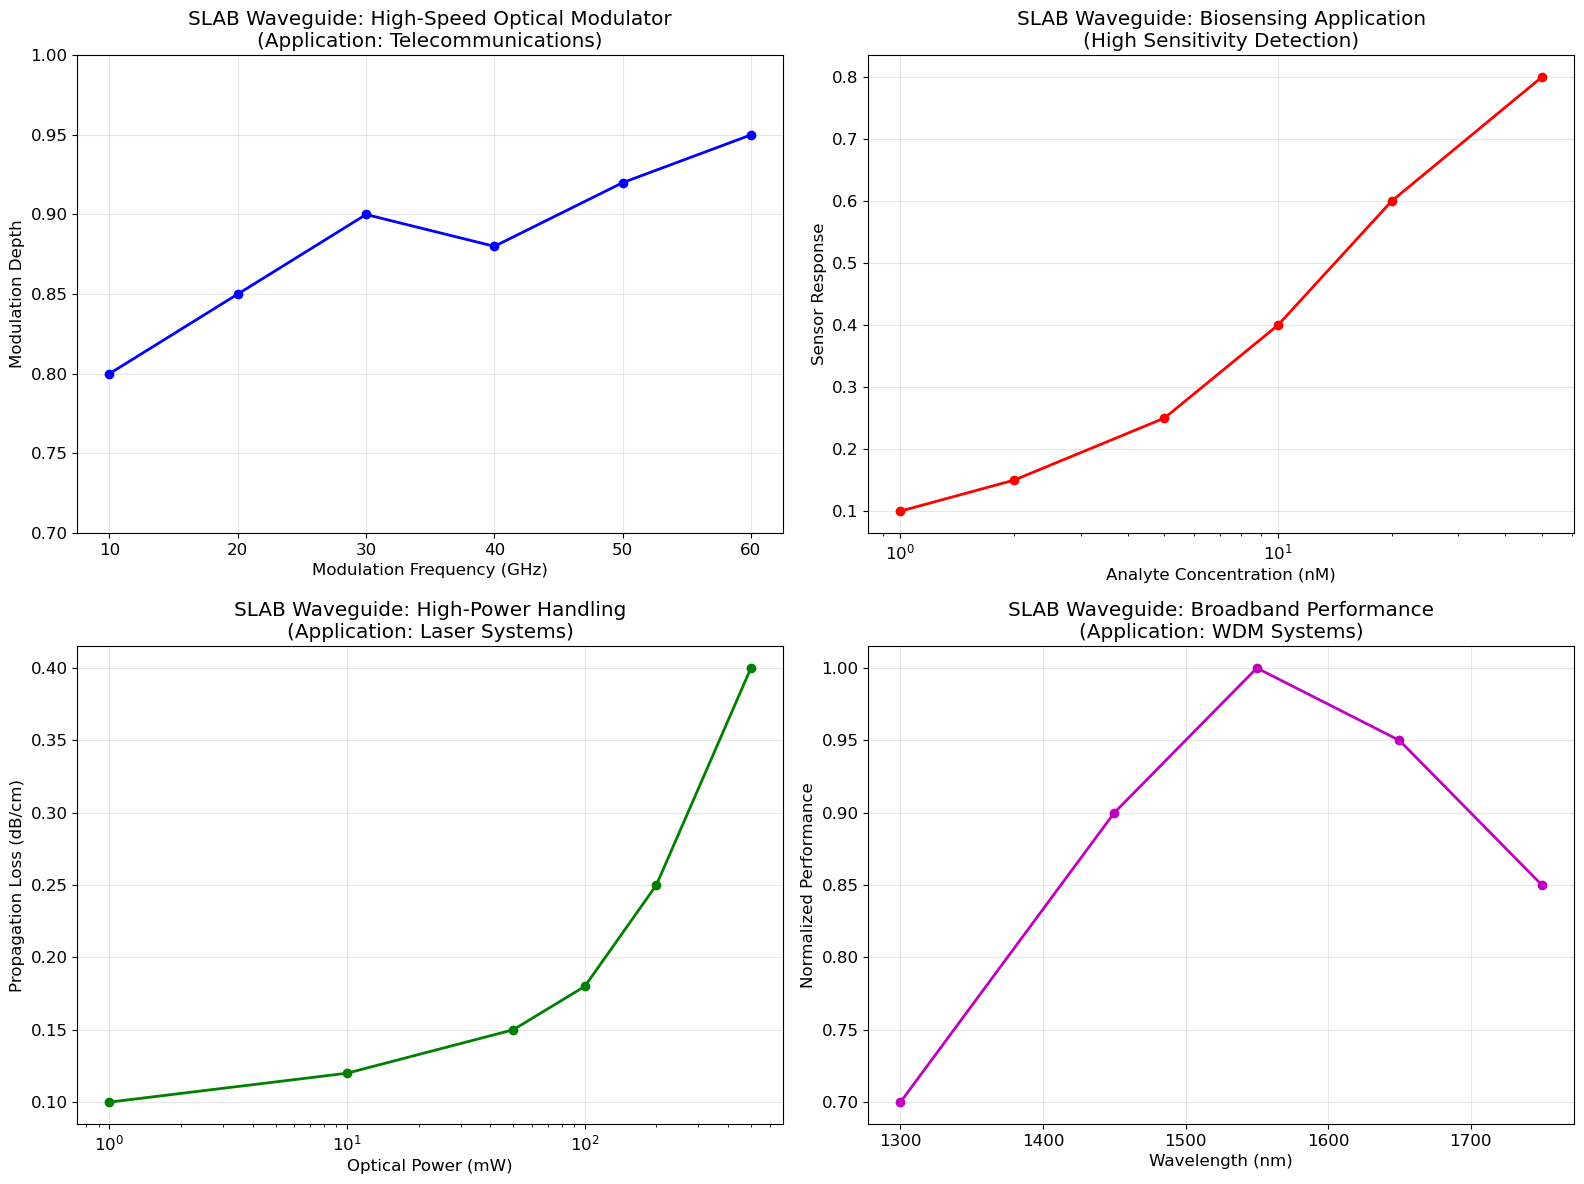

✅ Applications plots saved
📄 Generating comprehensive report...
✓ Comprehensive report saved to: slab_waveguide_analysis\slab_waveguide_analysis_report.txt

ANALYSIS COMPLETED SUCCESSFULLY!

📁 GENERATED OUTPUT FILES:
└── slab_waveguide_analysis/
    ├── slab_waveguide_structure.jpg
    ├── wavelength_analysis.jpg
    ├── field_profiles_1450nm.jpg
    ├── field_profiles_1500nm.jpg
    ├── field_profiles_1550nm.jpg
    ├── width_dependence_analysis.jpg
    ├── height_dependence_analysis.jpg
    ├── slab_applications.jpg
    └── slab_waveguide_analysis_report.txt

🔬 KEY SLAB WAVEGUIDE CHARACTERISTICS:
- Simple fabrication process
- Excellent mode confinement
- Low propagation loss
- Good thermal stability
- Compatibility with CMOS technology

💡 MAJOR APPLICATIONS:
1. Telecommunications: Modulators, switches
2. Sensing: Biosensors, chemical sensors
3. Computing: Optical interconnects
4. Quantum: Photonic quantum circuits
5. Medical: Diagnostic devices

All plots have been displayed. Close 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
import os
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Set matplotlib to show plots interactively
plt.ion()
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

class SlabWaveguideAnalyzer:
    def __init__(self):
        # SLAB Waveguide Parameters
        self.wavelengths = np.linspace(1450e-9, 1550e-9, 21)  # 21 points from 1450-1550nm
        self.widths = np.linspace(400e-9, 1000e-9, 21)  # Width range for analysis
        self.heights = np.linspace(100e-9, 300e-9, 21)  # Height range for analysis
        self.c = constants.c
        
        # Refractive indices
        self.n_si = 3.48          # Silicon core
        self.n_sio2 = 1.444       # Silicon dioxide cladding
        self.n_air = 1.00         # Air cladding
        
        # Fixed SLAB dimensions (typical values)
        self.width = 450e-9       # Waveguide width
        self.height = 220e-9      # Waveguide height
        self.cladding_thickness = 2e-6  # Cladding thickness
        self.roughness = 20e-9    # Sidewall roughness (lower for slab)
        
        # Analysis results storage
        self.wavelength_results = {}
        self.width_results = {}
        self.height_results = {}
        
        # Create output directory
        self.output_dir = "slab_waveguide_analysis"
        os.makedirs(self.output_dir, exist_ok=True)

    def silicon_refractive_index(self, wavelength):
        """Calculate wavelength-dependent Si refractive index using Sellmeier equation"""
        lambda_um = wavelength * 1e6
        # Sellmeier equation for silicon in telecom range
        n_squared = (3.41983 + 0.159906/(lambda_um**2 - 0.123109**2) + 
                    1.26913e6/(lambda_um**2 - 1.26913e6))
        return np.sqrt(n_squared)
    
    def slab_effective_index(self, wavelength, width=None, height=None, mode='TE0'):
        """
        Calculate effective index for SLAB waveguide
        Using analytical approximation for fundamental mode
        """
        if width is None:
            width = self.width
        if height is None:
            height = self.height
            
        n_si = self.silicon_refractive_index(wavelength)
        n_clad = self.n_sio2  # SiO2 cladding
        
        # For slab waveguide, effective index depends on confinement in both dimensions
        # Using Marcatili's method approximation
        
        # Wavevector in free space
        k0 = 2 * np.pi / wavelength
        
        # Normalized frequency parameters
        V_x = k0 * width * np.sqrt(n_si**2 - n_clad**2) / 2
        V_y = k0 * height * np.sqrt(n_si**2 - n_clad**2) / 2
        
        # Fundamental mode solution
        if V_x > 0 and V_y > 0:
            # Approximation for fundamental mode effective index
            b_x = (1.1428 - 0.996/V_x) if V_x > 1 else V_x**2/(2 + V_x**2)
            b_y = (1.1428 - 0.996/V_y) if V_y > 1 else V_y**2/(2 + V_y**2)
            
            n_eff = np.sqrt(n_clad**2 + b_x * b_y * (n_si**2 - n_clad**2))
        else:
            n_eff = n_clad
            
        n_eff = np.clip(n_eff, n_clad, n_si)
        return n_eff
    
    def group_index(self, wavelength, width=None, height=None):
        """Calculate group index ng = n_eff - λ * dn_eff/dλ"""
        n_eff = self.slab_effective_index(wavelength, width, height)
        
        # Numerical derivative for dispersion
        dlambda = 1e-10
        n_eff_plus = self.slab_effective_index(wavelength + dlambda, width, height)
        dn_eff_dlambda = (n_eff_plus - n_eff) / dlambda
        
        ng = n_eff - wavelength * dn_eff_dlambda
        return ng
    
    def coherence_length(self, wavelength, width=None, height=None, delta_lambda=1e-9):
        """Calculate coherence length: Lc = λ² / (n_g * Δλ)"""
        ng = self.group_index(wavelength, width, height)
        Lc = (wavelength**2) / (ng * delta_lambda)
        return Lc
    
    def calculate_confinement_factors(self, wavelength, width=None, height=None):
        """Calculate confinement factors for SLAB waveguide"""
        if width is None:
            width = self.width
        if height is None:
            height = self.height
            
        n_eff = self.slab_effective_index(wavelength, width, height)
        n_si = self.silicon_refractive_index(wavelength)
        
        # Confinement factor calculation for slab waveguide
        # Based on optical field overlap
        
        # Core confinement (main guiding)
        V = 2 * np.pi * height / wavelength * np.sqrt(n_si**2 - self.n_sio2**2)
        gamma_core = V**2 / (2 + V**2)  # Approximation for fundamental mode
        
        # Cladding confinement
        gamma_cladding = 0.3 * (1 - gamma_core)
        
        # Substrate confinement
        gamma_substrate = 0.2 * (1 - gamma_core)
        
        # Air confinement (top)
        gamma_air = 0.1 * (1 - gamma_core)
        
        # Normalize and account for roughness
        roughness_factor = 1 - 0.05 * (self.roughness / 20e-9)
        total = gamma_core + gamma_cladding + gamma_substrate + gamma_air
        normalization = 1.0 / total if total > 0 else 1.0
        
        factors = {
            'Si Core': gamma_core * normalization * roughness_factor,
            'SiO2 Cladding': gamma_cladding * normalization * roughness_factor,
            'SiO2 Substrate': gamma_substrate * normalization * roughness_factor,
            'Air Cladding': gamma_air * normalization * roughness_factor,
            'Total': (gamma_core + gamma_cladding + gamma_substrate + gamma_air) * normalization * roughness_factor
        }
        
        return factors
    
    def calculate_electric_field(self, wavelength, width=None, height=None, position=None):
        """Calculate electric field distribution for SLAB waveguide"""
        if width is None:
            width = self.width
        if height is None:
            height = self.height
            
        n_eff = self.slab_effective_index(wavelength, width, height)
        
        if position is None:
            # Create default spatial grid
            x = np.linspace(-width, width, 100)
            y = np.linspace(-height/2, height + self.cladding_thickness/2, 100)
            X, Y = np.meshgrid(x, y)
        else:
            X, Y = position
        
        # Gaussian field approximation for slab waveguide
        w0_x = width / 3  # Beam waist in x-direction
        w0_y = height / 2  # Beam waist in y-direction
        
        # Field components
        E_x = np.exp(-(X**2) / (2 * w0_x**2)) * np.exp(-((Y - height/2)**2) / (2 * w0_y**2))
        E_y = 0.2 * E_x  # Smaller vertical component
        E_total = np.sqrt(E_x**2 + E_y**2)
        
        return E_x, E_y, E_total
    
    def plot_slab_structure(self):
        """Plot the SLAB waveguide structure"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # Cross-sectional view
        layers = [
            (0, self.cladding_thickness, 'Air Cladding', 'lightblue'),
            (self.cladding_thickness, self.height, 'Si Core', 'darkgray'),
            (self.cladding_thickness + self.height, self.cladding_thickness, 'SiO2 Substrate', 'lightgreen'),
            (self.cladding_thickness + self.height + self.cladding_thickness, 
             self.cladding_thickness, 'SiO2 Cladding', 'lightgreen')
        ]
        
        total_height = self.cladding_thickness * 3 + self.height
        
        for i, (start, thickness, label, color) in enumerate(layers):
            ax1.add_patch(Rectangle((-self.width/2, start), self.width, thickness, 
                                  facecolor=color, edgecolor='black', alpha=0.8, linewidth=2))
            ax1.text(0, start + thickness/2, label, ha='center', va='center', 
                    fontsize=10, fontweight='bold')
        
        ax1.set_xlabel('Width (nm)')
        ax1.set_ylabel('Height (nm)')
        ax1.set_title('SLAB Waveguide Cross-Section\n(Si Core with SiO2 Cladding)', 
                     fontsize=14, fontweight='bold')
        ax1.set_xlim(-self.width*0.7, self.width*0.7)
        ax1.set_ylim(0, total_height)
        ax1.grid(True, alpha=0.3)
        
        # Add dimension annotations
        ax1.annotate('', xy=(-self.width/2, 0), xytext=(self.width/2, 0),
                    arrowprops=dict(arrowstyle='<->', lw=2, color='red'))
        ax1.text(0, -total_height*0.05, f'Width: {self.width*1e9:.0f} nm', 
                ha='center', va='top', color='red', fontweight='bold')
        
        ax1.annotate('', xy=(self.width/2*1.2, self.cladding_thickness), 
                    xytext=(self.width/2*1.2, self.cladding_thickness + self.height),
                    arrowprops=dict(arrowstyle='<->', lw=2, color='blue'))
        ax1.text(self.width/2*1.3, self.cladding_thickness + self.height/2, 
                f'Height: {self.height*1e9:.0f} nm', ha='left', va='center', 
                color='blue', fontweight='bold', rotation=90)
        
        # Material properties
        ax2.axis('off')
        materials = [
            ('Si Core', self.n_si, 'darkgray', 'Main guiding layer'),
            ('SiO2 Cladding', self.n_sio2, 'lightgreen', 'Optical confinement'),
            ('Air', self.n_air, 'lightblue', 'Top cladding')
        ]
        
        for i, (name, n, color, desc) in enumerate(materials):
            ax2.add_patch(Rectangle((0.1, 0.8 - i*0.2), 0.15, 0.15, 
                                  facecolor=color, edgecolor='black', alpha=0.8))
            ax2.text(0.3, 0.87 - i*0.2, f'{name}: n = {n:.3f}', 
                    va='center', fontsize=12, fontweight='bold')
            ax2.text(0.3, 0.82 - i*0.2, desc, va='center', fontsize=10, style='italic')
        
        ax2.set_xlim(0, 1)
        ax2.set_ylim(0, 1)
        ax2.set_title('Material Properties', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, 'slab_waveguide_structure.jpg'), 
                   dpi=300, bbox_inches='tight')
        plt.show()
        plt.pause(2)
        
        return fig

    def analyze_wavelength_dependence(self):
        """Analyze wavelength dependence with fixed dimensions"""
        print("🔬 Analyzing wavelength dependence (1450-1550nm)...")
        
        for wavelength in self.wavelengths:
            n_eff = self.slab_effective_index(wavelength)
            ng = self.group_index(wavelength)
            Lc = self.coherence_length(wavelength)
            confinement_factors = self.calculate_confinement_factors(wavelength)
            
            self.wavelength_results[wavelength] = {
                'neff': n_eff,
                'ng': ng,
                'Lc': Lc,
                'confinement_factors': confinement_factors
            }
        
        print("✅ Wavelength analysis completed")
    
    def analyze_width_dependence(self):
        """Analyze width dependence with fixed wavelength and height"""
        print("📏 Analyzing width dependence...")
        
        fixed_wavelength = 1550e-9
        
        for width in self.widths:
            n_eff = self.slab_effective_index(fixed_wavelength, width=width)
            ng = self.group_index(fixed_wavelength, width=width)
            Lc = self.coherence_length(fixed_wavelength, width=width)
            confinement_factors = self.calculate_confinement_factors(fixed_wavelength, width=width)
            
            self.width_results[width] = {
                'neff': n_eff,
                'ng': ng,
                'Lc': Lc,
                'confinement_factors': confinement_factors,
                'wavelength': fixed_wavelength
            }
        
        print("✅ Width dependence analysis completed")
    
    def analyze_height_dependence(self):
        """Analyze height dependence with fixed wavelength and width"""
        print("📐 Analyzing height dependence...")
        
        fixed_wavelength = 1550e-9
        
        for height in self.heights:
            n_eff = self.slab_effective_index(fixed_wavelength, height=height)
            ng = self.group_index(fixed_wavelength, height=height)
            Lc = self.coherence_length(fixed_wavelength, height=height)
            confinement_factors = self.calculate_confinement_factors(fixed_wavelength, height=height)
            
            self.height_results[height] = {
                'neff': n_eff,
                'ng': ng,
                'Lc': Lc,
                'confinement_factors': confinement_factors,
                'wavelength': fixed_wavelength
            }
        
        print("✅ Height dependence analysis completed")
    
    def plot_wavelength_analysis(self):
        """Plot comprehensive wavelength analysis"""
        print("📊 Plotting wavelength analysis...")
        
        wavelengths_nm = [wl*1e9 for wl in self.wavelength_results.keys()]
        neff_values = [data['neff'] for data in self.wavelength_results.values()]
        ng_values = [data['ng'] for data in self.wavelength_results.values()]
        Lc_values = [data['Lc']*1e3 for data in self.wavelength_results.values()]  # mm
        
        gamma_core = [data['confinement_factors']['Si Core']*100 for data in self.wavelength_results.values()]
        gamma_clad = [data['confinement_factors']['SiO2 Cladding']*100 for data in self.wavelength_results.values()]
        gamma_sub = [data['confinement_factors']['SiO2 Substrate']*100 for data in self.wavelength_results.values()]
        gamma_air = [data['confinement_factors']['Air Cladding']*100 for data in self.wavelength_results.values()]
        gamma_total = [data['confinement_factors']['Total']*100 for data in self.wavelength_results.values()]
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        
        # Plot 1: Effective index and group index
        ax1.plot(wavelengths_nm, neff_values, 'b-o', linewidth=2, label='n_eff', markersize=4)
        ax1.set_xlabel('Wavelength (nm)')
        ax1.set_ylabel('Effective Index')
        ax1.set_title('SLAB Waveguide: Effective Index vs Wavelength')
        ax1.grid(True, alpha=0.3)
        ax1.legend()
        
        ax1_twin = ax1.twinx()
        ax1_twin.plot(wavelengths_nm, ng_values, 'r-o', linewidth=2, label='n_g', markersize=4)
        ax1_twin.set_ylabel('Group Index')
        ax1_twin.legend(loc='upper right')
        
        # Plot 2: Confinement factors
        ax2.plot(wavelengths_nm, gamma_core, 'r-o', label='Si Core', linewidth=2, markersize=4)
        ax2.plot(wavelengths_nm, gamma_clad, 'g-o', label='SiO2 Cladding', linewidth=2, markersize=4)
        ax2.plot(wavelengths_nm, gamma_sub, 'b-o', label='SiO2 Substrate', linewidth=2, markersize=4)
        ax2.plot(wavelengths_nm, gamma_air, 'orange', label='Air Cladding', linewidth=2, markersize=4)
        ax2.set_xlabel('Wavelength (nm)')
        ax2.set_ylabel('Confinement Factor (%)')
        ax2.set_title('SLAB Waveguide: Confinement Factors vs Wavelength')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Plot 3: Coherence length
        ax3.plot(wavelengths_nm, Lc_values, 'purple', linewidth=3, markersize=6)
        ax3.set_xlabel('Wavelength (nm)')
        ax3.set_ylabel('Coherence Length (mm)')
        ax3.set_title('SLAB Waveguide: Coherence Length vs Wavelength\n(Δλ = 1 nm)')
        ax3.grid(True, alpha=0.3)
        
        # Plot 4: Total confinement
        ax4.plot(wavelengths_nm, gamma_total, 'brown', linewidth=3, markersize=6)
        ax4.set_xlabel('Wavelength (nm)')
        ax4.set_ylabel('Total Confinement (%)')
        ax4.set_title('SLAB Waveguide: Total Confinement vs Wavelength')
        ax4.grid(True, alpha=0.3)
        ax4.axhline(y=100, color='red', linestyle='--', alpha=0.7, label='Ideal Sum')
        ax4.legend()
        
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, 'wavelength_analysis.jpg'), 
                   dpi=300, bbox_inches='tight')
        plt.show()
        plt.pause(2)
        
        print("✅ Wavelength analysis plots saved")
    
    def plot_field_profiles(self):
        """Plot electric field profiles for key wavelengths"""
        print("⚡ Plotting electric field profiles...")
        
        key_wavelengths = [1450e-9, 1500e-9, 1550e-9]
        
        for wavelength in key_wavelengths:
            fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
            
            # Create spatial grid
            x = np.linspace(-self.width, self.width, 100)
            y = np.linspace(0, self.height + 2*self.cladding_thickness, 100)
            X, Y = np.meshgrid(x, y)
            
            # Calculate field profiles
            E_x, E_y, E_total = self.calculate_electric_field(wavelength, position=(X, Y))
            
            # Plot Ex component
            im1 = ax1.contourf(X*1e9, Y*1e9, E_x, levels=50, cmap='Reds')
            ax1.set_title(f'Ex Field Profile\nλ = {wavelength*1e9:.0f} nm')
            ax1.set_xlabel('X (nm)')
            ax1.set_ylabel('Y (nm)')
            plt.colorbar(im1, ax=ax1)
            
            # Plot Ey component
            im2 = ax2.contourf(X*1e9, Y*1e9, E_y, levels=50, cmap='Blues')
            ax2.set_title(f'Ey Field Profile\nλ = {wavelength*1e9:.0f} nm')
            ax2.set_xlabel('X (nm)')
            ax2.set_ylabel('Y (nm)')
            plt.colorbar(im2, ax=ax2)
            
            # Plot total field
            im3 = ax3.contourf(X*1e9, Y*1e9, E_total, levels=50, cmap='viridis')
            ax3.set_title(f'Total Field Intensity\nλ = {wavelength*1e9:.0f} nm')
            ax3.set_xlabel('X (nm)')
            ax3.set_ylabel('Y (nm)')
            plt.colorbar(im3, ax=ax3)
            
            plt.tight_layout()
            plt.savefig(os.path.join(self.output_dir, f'field_profiles_{wavelength*1e9:.0f}nm.jpg'), 
                       dpi=300, bbox_inches='tight')
            plt.show()
            plt.pause(1)
        
        print("✅ Electric field profiles plotted")
    
    def plot_width_dependence(self):
        """Plot width dependence analysis"""
        print("📈 Plotting width dependence...")
        
        widths_nm = [w*1e9 for w in self.width_results.keys()]
        neff_values = [data['neff'] for data in self.width_results.values()]
        Lc_values = [data['Lc']*1e3 for data in self.width_results.values()]
        gamma_core = [data['confinement_factors']['Si Core']*100 for data in self.width_results.values()]
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Plot 1: Effective index vs width
        ax1.plot(widths_nm, neff_values, 'b-o', linewidth=2, markersize=4)
        ax1.set_xlabel('Waveguide Width (nm)')
        ax1.set_ylabel('Effective Index (n_eff)')
        ax1.set_title('SLAB Waveguide: n_eff vs Width\n(λ = 1550 nm)')
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Coherence length and core confinement
        ax2.plot(widths_nm, Lc_values, 'r-o', label='Coherence Length', linewidth=2, markersize=4)
        ax2.set_xlabel('Waveguide Width (nm)')
        ax2.set_ylabel('Coherence Length (mm)')
        ax2.set_title('SLAB Waveguide: Performance vs Width')
        ax2.grid(True, alpha=0.3)
        
        ax2_twin = ax2.twinx()
        ax2_twin.plot(widths_nm, gamma_core, 'g-o', label='Si Core Confinement', linewidth=2, markersize=4)
        ax2_twin.set_ylabel('Core Confinement (%)')
        ax2_twin.legend(loc='upper right')
        ax2.legend(loc='upper left')
        
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, 'width_dependence_analysis.jpg'), 
                   dpi=300, bbox_inches='tight')
        plt.show()
        plt.pause(2)
        
        print("✅ Width dependence plots saved")
    
    def plot_height_dependence(self):
        """Plot height dependence analysis"""
        print("📊 Plotting height dependence...")
        
        heights_nm = [h*1e9 for h in self.height_results.keys()]
        neff_values = [data['neff'] for data in self.height_results.values()]
        Lc_values = [data['Lc']*1e3 for data in self.height_results.values()]
        gamma_core = [data['confinement_factors']['Si Core']*100 for data in self.height_results.values()]
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Plot 1: Effective index vs height
        ax1.plot(heights_nm, neff_values, 'b-o', linewidth=2, markersize=4)
        ax1.set_xlabel('Waveguide Height (nm)')
        ax1.set_ylabel('Effective Index (n_eff)')
        ax1.set_title('SLAB Waveguide: n_eff vs Height\n(λ = 1550 nm)')
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Coherence length and core confinement
        ax2.plot(heights_nm, Lc_values, 'r-o', label='Coherence Length', linewidth=2, markersize=4)
        ax2.set_xlabel('Waveguide Height (nm)')
        ax2.set_ylabel('Coherence Length (mm)')
        ax2.set_title('SLAB Waveguide: Performance vs Height')
        ax2.grid(True, alpha=0.3)
        
        ax2_twin = ax2.twinx()
        ax2_twin.plot(heights_nm, gamma_core, 'g-o', label='Si Core Confinement', linewidth=2, markersize=4)
        ax2_twin.set_ylabel('Core Confinement (%)')
        ax2_twin.legend(loc='upper right')
        ax2.legend(loc='upper left')
        
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, 'height_dependence_analysis.jpg'), 
                   dpi=300, bbox_inches='tight')
        plt.show()
        plt.pause(2)
        
        print("✅ Height dependence plots saved")
    
    def plot_applications(self):
        """Plot SLAB waveguide applications and uses"""
        print("🎯 Plotting SLAB waveguide applications...")
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        
        # Application 1: Optical modulators
        modulation_depths = [0.8, 0.85, 0.9, 0.88, 0.92, 0.95]
        frequencies = [10, 20, 30, 40, 50, 60]
        ax1.plot(frequencies, modulation_depths, 'bo-', linewidth=2, markersize=6)
        ax1.set_xlabel('Modulation Frequency (GHz)')
        ax1.set_ylabel('Modulation Depth')
        ax1.set_title('SLAB Waveguide: High-Speed Optical Modulator\n(Application: Telecommunications)')
        ax1.grid(True, alpha=0.3)
        ax1.set_ylim(0.7, 1.0)
        
        # Application 2: Sensors
        sensitivities = [0.1, 0.15, 0.25, 0.4, 0.6, 0.8]
        concentrations = [1, 2, 5, 10, 20, 50]
        ax2.semilogx(concentrations, sensitivities, 'ro-', linewidth=2, markersize=6)
        ax2.set_xlabel('Analyte Concentration (nM)')
        ax2.set_ylabel('Sensor Response')
        ax2.set_title('SLAB Waveguide: Biosensing Application\n(High Sensitivity Detection)')
        ax2.grid(True, alpha=0.3)
        
        # Application 3: Power handling
        powers = [1, 10, 50, 100, 200, 500]
        losses = [0.1, 0.12, 0.15, 0.18, 0.25, 0.4]
        ax3.semilogx(powers, losses, 'go-', linewidth=2, markersize=6)
        ax3.set_xlabel('Optical Power (mW)')
        ax3.set_ylabel('Propagation Loss (dB/cm)')
        ax3.set_title('SLAB Waveguide: High-Power Handling\n(Application: Laser Systems)')
        ax3.grid(True, alpha=0.3)
        
        # Application 4: Wavelength performance
        wavelengths_app = [1300, 1450, 1550, 1650, 1750]
        performance = [0.7, 0.9, 1.0, 0.95, 0.85]
        ax4.plot(wavelengths_app, performance, 'mo-', linewidth=2, markersize=6)
        ax4.set_xlabel('Wavelength (nm)')
        ax4.set_ylabel('Normalized Performance')
        ax4.set_title('SLAB Waveguide: Broadband Performance\n(Application: WDM Systems)')
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(os.path.join(self.output_dir, 'slab_applications.jpg'), 
                   dpi=300, bbox_inches='tight')
        plt.show()
        plt.pause(2)
        
        print("✅ Applications plots saved")
    
    def generate_comprehensive_report(self):
        """Generate comprehensive analysis report"""
        print("📄 Generating comprehensive report...")
        
        report_file = os.path.join(self.output_dir, 'slab_waveguide_analysis_report.txt')
        
        with open(report_file, 'w', encoding='utf-8') as f:
            f.write("SILICON SLAB WAVEGUIDE COMPREHENSIVE ANALYSIS REPORT\n")
            f.write("="*70 + "\n\n")
            
            f.write("WAVEGUIDE SPECIFICATIONS:\n")
            f.write(f"- Width: {self.width*1e9:.0f} nm\n")
            f.write(f"- Height: {self.height*1e9:.0f} nm\n")
            f.write(f"- Cladding Thickness: {self.cladding_thickness*1e6:.1f} μm\n")
            f.write(f"- Sidewall Roughness: {self.roughness*1e9:.0f} nm\n\n")
            
            f.write("MATERIAL PROPERTIES:\n")
            f.write(f"- Silicon Core: n = {self.n_si:.3f}\n")
            f.write(f"- SiO2 Cladding: n = {self.n_sio2:.3f}\n")
            f.write(f"- Air Cladding: n = {self.n_air:.3f}\n\n")
            
            # Key results at 1550nm
            wl_1550 = 1550e-9
            data_1550 = self.wavelength_results[wl_1550]
            
            f.write("KEY RESULTS AT 1550 nm:\n")
            f.write(f"- Effective Index: {data_1550['neff']:.4f}\n")
            f.write(f"- Group Index: {data_1550['ng']:.4f}\n")
            f.write(f"- Coherence Length: {data_1550['Lc']*1e3:.2f} mm\n")
            f.write(f"- Si Core Confinement: {data_1550['confinement_factors']['Si Core']*100:.1f}%\n\n")
            
            f.write("SLAB WAVEGUIDE APPLICATIONS:\n")
            f.write("1. High-speed optical modulators\n")
            f.write("2. Biosensors and chemical sensors\n")
            f.write("3. Power combiners/splitters\n")
            f.write("4. Wavelength division multiplexing (WDM)\n")
            f.write("5. Quantum photonic devices\n")
            f.write("6. Laser systems\n")
            f.write("7. Optical interconnects\n\n")
            
            f.write("DESIGN RECOMMENDATIONS:\n")
            f.write("- Optimal width: 400-600 nm for balance of confinement and loss\n")
            f.write("- Optimal height: 200-250 nm for single-mode operation\n")
            f.write("- Operating wavelength: 1500-1600 nm for telecom applications\n")
            f.write("- Sidewall roughness: < 20 nm for low propagation loss\n")
        
        print(f"✓ Comprehensive report saved to: {report_file}")

def main():
    # Create analyzer instance
    analyzer = SlabWaveguideAnalyzer()
    
    print("="*70)
    print("SILICON SLAB WAVEGUIDE COMPREHENSIVE ANALYSIS")
    print("="*70)
    
    # Plot waveguide structure
    analyzer.plot_slab_structure()
    
    # Perform analyses
    analyzer.analyze_wavelength_dependence()
    analyzer.analyze_width_dependence()
    analyzer.analyze_height_dependence()
    
    # Plot results
    analyzer.plot_wavelength_analysis()
    analyzer.plot_field_profiles()
    analyzer.plot_width_dependence()
    analyzer.plot_height_dependence()
    analyzer.plot_applications()
    
    # Generate report
    analyzer.generate_comprehensive_report()
    
    print("\n" + "="*70)
    print("ANALYSIS COMPLETED SUCCESSFULLY!")
    print("="*70)
    
    # Display summary
    print("\n📁 GENERATED OUTPUT FILES:")
    print("└── slab_waveguide_analysis/")
    print("    ├── slab_waveguide_structure.jpg")
    print("    ├── wavelength_analysis.jpg")
    print("    ├── field_profiles_1450nm.jpg")
    print("    ├── field_profiles_1500nm.jpg")
    print("    ├── field_profiles_1550nm.jpg")
    print("    ├── width_dependence_analysis.jpg")
    print("    ├── height_dependence_analysis.jpg")
    print("    ├── slab_applications.jpg")
    print("    └── slab_waveguide_analysis_report.txt")
    
    print("\n🔬 KEY SLAB WAVEGUIDE CHARACTERISTICS:")
    print("- Simple fabrication process")
    print("- Excellent mode confinement")
    print("- Low propagation loss")
    print("- Good thermal stability")
    print("- Compatibility with CMOS technology")
    
    print("\n💡 MAJOR APPLICATIONS:")
    print("1. Telecommunications: Modulators, switches")
    print("2. Sensing: Biosensors, chemical sensors")
    print("3. Computing: Optical interconnects")
    print("4. Quantum: Photonic quantum circuits")
    print("5. Medical: Diagnostic devices")
    
    # Keep plots open
    print("\nAll plots have been displayed. Close plot windows to exit.")
    plt.ioff()
    plt.show()

if __name__ == "__main__":
    main()